Use Case 9
==========

Problem Definition:
-------------------

A climate scientist wishes to analyse potential correlations between *Ozone* and *Cloud* ECVs.

Required Toolbox Features:
--------------------------

* Access to and ingestion of ESA CCI Ozone and Cloud data (Atmosphere Mole Content of Ozone and Cloud Cover)
* Geometric adjustments (coregistration)
* Spatial (point, polygon) and temporal subsetting
* Visualisation of time series
* Correlation analysis, scatter-plot of correlation statistics, saving of image and correlation statistics on disk (format options)

Ingest data and create datasets
-------------------------------

In [1]:
from ect.core.ds import DATA_STORE_REGISTRY
from ect.core.monitor import ConsoleMonitor
import ect.ops as ops

In [2]:
monitor = ConsoleMonitor()

In [3]:
data_store = DATA_STORE_REGISTRY.get_data_store('esa_cci_odp')

In [4]:
data_store.query('ozone')

[esacci.OZONE.day.L3S.TC.GOME-2.Metop-A.MERGED.fv0100.r1,
 esacci.OZONE.day.L3S.TC.GOME.ERS-2.MERGED.fv0100.r1,
 esacci.OZONE.mon.L3.NP.multi-sensor.multi-platform.MERGED.fv0002.r1]

In [5]:
data_store.query('cloud')

[esacci.CLOUD.mon.L3C.CLD_PRODUCTS.AVHRR.NOAA-18.AVHRR_NOAA.1-0.r1,
 esacci.CLOUD.day.L3U.CLD_PRODUCTS.AVHRR.NOAA-15.AVHRR_NOAA.1-0.r1,
 esacci.CLOUD.day.L3U.CLD_PRODUCTS.AVHRR.NOAA-17.AVHRR_NOAA.1-0.r1,
 esacci.CLOUD.day.L3U.CLD_PRODUCTS.AVHRR.NOAA-18.AVHRR_NOAA.1-0.r1,
 esacci.CLOUD.day.L3U.CLD_PRODUCTS.AVHRR.NOAA-16.AVHRR_NOAA.1-0.r1,
 esacci.CLOUD.day.L3U.CLD_PRODUCTS.MODIS.Terra.MODIS_TERRA.1-0.r1,
 esacci.CLOUD.day.L3U.CLD_PRODUCTS.MODIS.Aqua.MODIS_AQUA.1-0.r1,
 esacci.CLOUD.mon.L3S.CLD_PRODUCTS.MODIS.multi-platform.MODIS_MERGED.1-0.r1,
 esacci.CLOUD.mon.L3S.CLD_PRODUCTS.AVHRR.multi-platform.AVHRR_MERGED.1-0.r1,
 esacci.CLOUD.mon.L3C.CLD_PRODUCTS.AVHRR.NOAA-16.AVHRR_NOAA.1-0.r1,
 esacci.CLOUD.mon.L3C.CLD_PRODUCTS.AVHRR.NOAA-15.AVHRR_NOAA.1-0.r1,
 esacci.CLOUD.mon.L3C.CLD_PRODUCTS.AVHRR.NOAA-17.AVHRR_NOAA.1-0.r1,
 esacci.CLOUD.mon.L3C.CLD_PRODUCTS.MODIS.Terra.MODIS_TERRA.1-0.r1,
 esacci.CLOUD.mon.L3C.CLD_PRODUCTS.MODIS.Aqua.MODIS_AQUA.1-0.r1]

In [6]:
cc = ops.open_dataset('esacci.CLOUD.mon.L3C.CLD_PRODUCTS.AVHRR.NOAA-17.AVHRR_NOAA.1-0.r1',
                      '2007-01-01',
                      '2007-12-31', sync=True, monitor=monitor)

In [7]:
oz = ops.open_dataset('esacci.OZONE.mon.L3.NP.multi-sensor.multi-platform.MERGED.fv0002.r1',
                      '2007-01-01',
                      '2007-12-21', sync=True, monitor=monitor)

In [8]:
oz

<xarray.Dataset>
Dimensions:           (air_pressure: 17, lat: 180, layers: 16, lon: 360, time: 12)
Coordinates:
  * lon               (lon) float32 -179.5 -178.5 -177.5 -176.5 -175.5 ...
  * lat               (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 -84.5 ...
  * layers            (layers) int32 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16
  * air_pressure      (air_pressure) float32 1013.0 446.05 196.35 113.63 ...
  * time              (time) datetime64[ns] 2007-01-04 2007-02-01 2007-03-01 ...
Data variables:
    surface_pressure  (time, lat, lon) float32 679.977 680.113 682.855 ...
    O3e_du            (time, layers, lat, lon) float32 1.18361 1.44011 ...
    O3_du             (time, layers, lat, lon) float32 4.77314 4.80547 ...
    O3e_vmr           (time, air_pressure, lat, lon) float32 0.00287585 ...
    O3_du_tot         (time, lat, lon) float32 260.176 264.998 267.394 ...
    O3_ndens          (time, air_pressure, lat, lon) float32 2.80126e+11 ...
    O3e_du_tot        (time, lat,

Filter datasets to select the desired variables
-----------------------------------------------

In [9]:
cc_tot = ops.select_var(cc, 'cc_total')
oz_tot = ops.select_var(oz, 'O3_du_tot')

In [10]:
oz_tot

<xarray.Dataset>
Dimensions:       (air_pressure: 17, lat: 180, layers: 16, lon: 360, time: 12)
Coordinates:
  * lon           (lon) float32 -179.5 -178.5 -177.5 -176.5 -175.5 -174.5 ...
  * lat           (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 -84.5 -83.5 ...
  * layers        (layers) int32 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16
  * air_pressure  (air_pressure) float32 1013.0 446.05 196.35 113.63 65.75 ...
  * time          (time) datetime64[ns] 2007-01-04 2007-02-01 2007-03-01 ...
Data variables:
    O3_du_tot     (time, lat, lon) float32 260.176 264.998 267.394 265.048 ...

Plot the first time slice of the dataset

/home/ccitbx/miniconda3/envs/ect_env/lib/python3.5/site-packages/matplotlib/artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


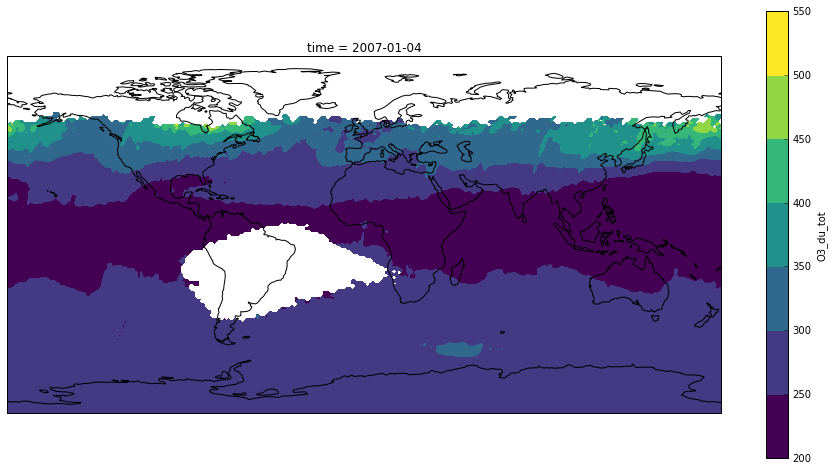

In [11]:
%matplotlib inline
ops.plot_map(oz_tot, var='O3_du_tot', time=0, file='/home/ccitbx/Desktop/fig1.png')

/home/ccitbx/miniconda3/envs/ect_env/lib/python3.5/site-packages/matplotlib/artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


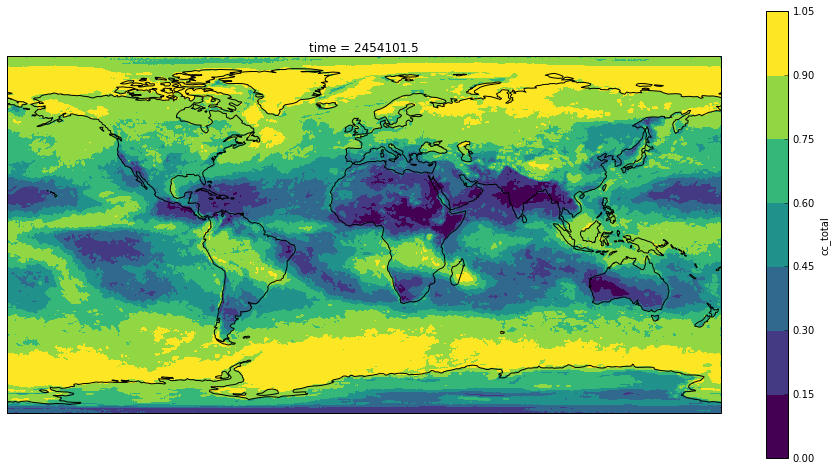

In [12]:
ops.plot_map(cc_tot, var='cc_total', time=0, file='/home/ccitbx/Desktop/fig2.png')

Co-register datasets by resampling
----------------------------------

In [13]:
print(cc_tot['cc_total'].shape)
print(oz_tot['O3_du_tot'].shape)

(12, 360, 720)
(12, 180, 360)


In [14]:
cc_tot_res = ops.coregister(oz_tot, cc_tot)

In [15]:
print(cc_tot_res['cc_total'].shape)
print(oz_tot['O3_du_tot'].shape)

(12, 180, 360)
(12, 180, 360)


/home/ccitbx/miniconda3/envs/ect_env/lib/python3.5/site-packages/matplotlib/artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


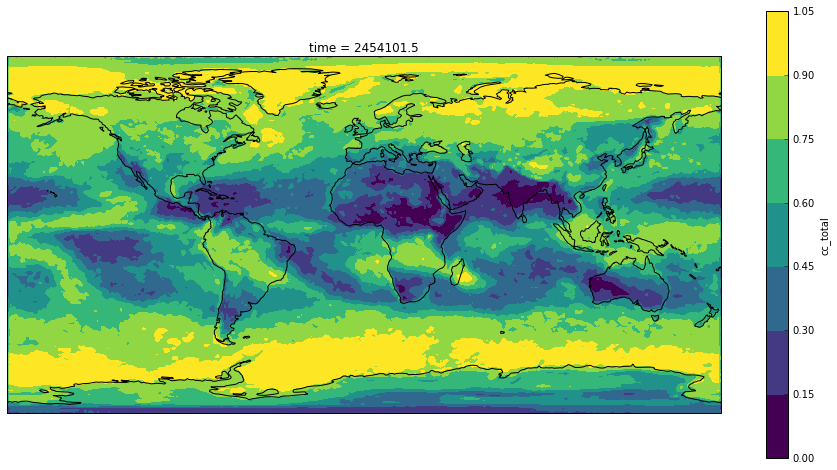

In [16]:
ops.plot_map(cc_tot_res, var='cc_total', time=0, file='/home/ccitbx/Desktop/fig3.png')

Select the desired spatial region
---------------------------------

In [17]:
cc_tot_africa = ops.subset_spatial(cc_tot_res,-40.,40.,-20.,60.)
oz_tot_africa = ops.subset_spatial(oz_tot,-40.,40.,-20.,60.)
# Subsetting coordinates can also be named. e.g. lat_min=-40.0, lat_max=40.0, etc

/home/ccitbx/miniconda3/envs/ect_env/lib/python3.5/site-packages/matplotlib/artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


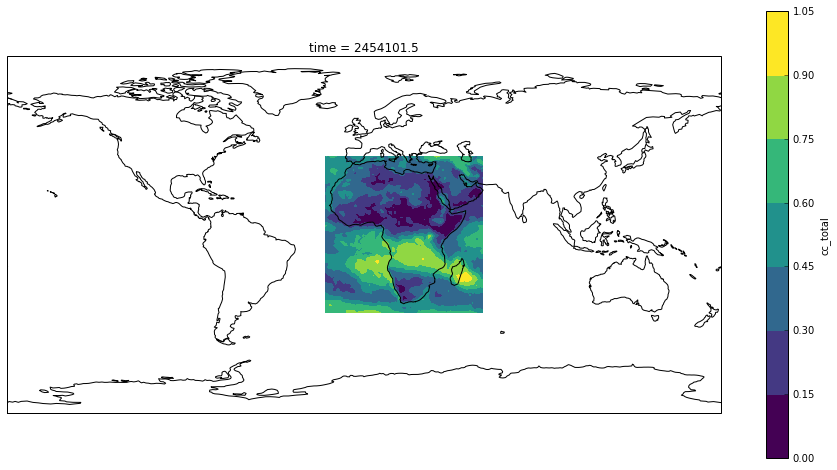

In [18]:
ops.plot_map(cc_tot_africa, var='cc_total', time=0, file='/home/ccitbx/Desktop/fig4.png')

/home/ccitbx/miniconda3/envs/ect_env/lib/python3.5/site-packages/matplotlib/artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


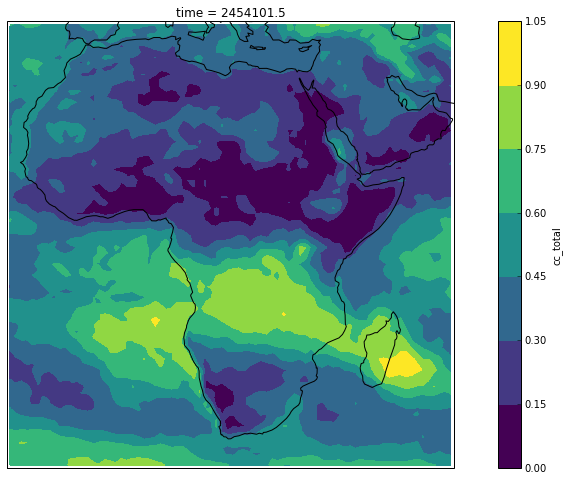

In [19]:
ops.plot_map(cc_tot_africa, var='cc_total', time=0, 
                 lat_min=-40., lat_max=40., lon_min=-20., lon_max=60., file='/home/ccitbx/Desktop/fig5.png')

Select the desired temporal region
----------------------------------

In [20]:
cc_tot_janoct = ops.subset_temporal(cc_tot_africa, '2007-01-01', '2007-10-30')
oz_tot_janoct = ops.subset_temporal(oz_tot_africa, '2007-01-01', '2007-10-30')

In [21]:
print(cc_tot_janoct.time)

<xarray.DataArray 'time' (time: 10)>
array([ 2454101.5,  2454132.5,  2454160.5,  2454191.5,  2454221.5,
        2454252.5,  2454282.5,  2454313.5,  2454344.5,  2454374.5])
Coordinates:
  * time     (time) float64 2.454e+06 2.454e+06 2.454e+06 2.454e+06 ...
Attributes:
    long_name: time in julian days
    calendar: julian
    units: day
    standard_name: time


In [22]:
print(oz_tot_janoct.time)

<xarray.DataArray 'time' (time: 10)>
array(['2007-01-04T01:00:00.000000000+0100',
       '2007-02-01T01:00:00.000000000+0100',
       '2007-03-01T01:00:00.000000000+0100',
       '2007-04-01T02:00:00.000000000+0200',
       '2007-05-01T02:00:00.000000000+0200',
       '2007-06-01T02:00:00.000000000+0200',
       '2007-07-01T02:00:00.000000000+0200',
       '2007-08-01T02:00:00.000000000+0200',
       '2007-09-01T02:00:00.000000000+0200',
       '2007-10-01T02:00:00.000000000+0200'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2007-01-04 2007-02-01 2007-03-01 ...
Attributes:
    standard_name: time
    long_name: time


Retrieve and plot timeseries
----------------------------

In [23]:
oz_ts_point = ops.tseries_point(oz_tot_janoct, lat=50., lon=50.)
cc_ts_point = ops.tseries_point(cc_tot_janoct, lat=50., lon=50.)
oz_ts_mean = ops.tseries_mean(oz_tot_janoct, var='O3_du_tot')
cc_ts_mean = ops.tseries_mean(cc_tot_janoct, var='cc_total')

In [24]:
print(oz_ts_mean)

<xarray.Dataset>
Dimensions:        (air_pressure: 17, lat: 80, layers: 16, lon: 80, time: 10)
Coordinates:
  * lon            (lon) float32 -19.5 -18.5 -17.5 -16.5 -15.5 -14.5 -13.5 ...
  * lat            (lat) float32 -39.5 -38.5 -37.5 -36.5 -35.5 -34.5 -33.5 ...
  * layers         (layers) int32 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16
  * air_pressure   (air_pressure) float32 1013.0 446.05 196.35 113.63 65.75 ...
  * time           (time) datetime64[ns] 2007-01-04 2007-02-01 2007-03-01 ...
Data variables:
    O3_du_tot      (time) float32 258.0 261.7 268.9 272.1 268.9 270.6 270.7 ...
    O3_du_tot_std  (time) float32 18.92 24.23 29.31 30.82 23.99 19.13 16.1 ...


In [25]:
print(cc_ts_mean)

<xarray.Dataset>
Dimensions:       (lat: 80, lon: 80, time: 10)
Coordinates:
  * time          (time) float64 2.454e+06 2.454e+06 2.454e+06 2.454e+06 ...
  * lon           (lon) float32 -19.5 -18.5 -17.5 -16.5 -15.5 -14.5 -13.5 ...
  * lat           (lat) float32 -39.5 -38.5 -37.5 -36.5 -35.5 -34.5 -33.5 ...
Data variables:
    cc_total      (time) float64 0.4251 0.4212 0.3855 0.3954 0.347 0.3419 ...
    cc_total_std  (time) float64 0.205 0.2103 0.1898 0.2035 0.2079 0.22 ...


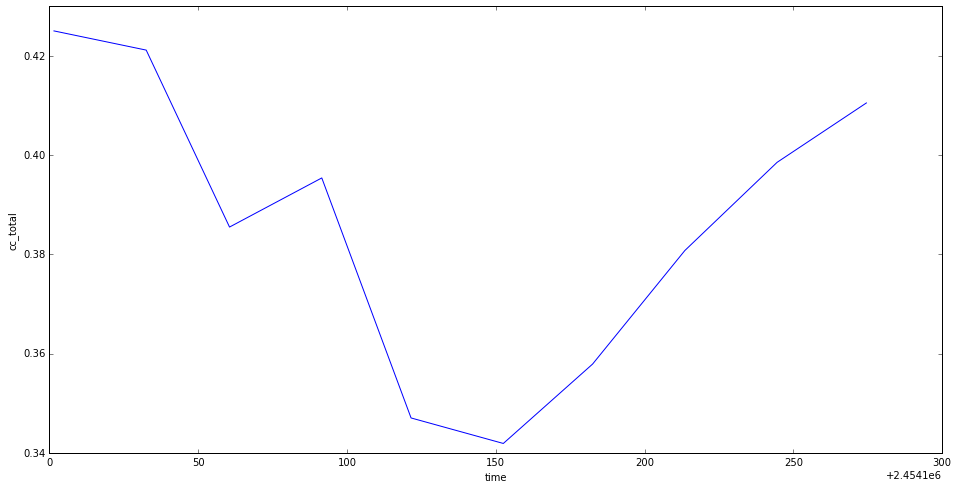

In [26]:
ops.plot_1D(cc_ts_mean, 'cc_total', file='/home/ccitbx/Desktop/fig6.png')

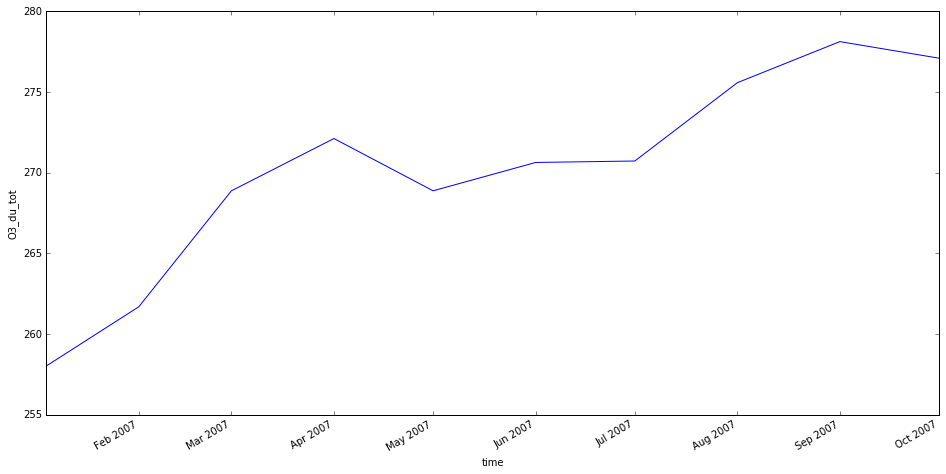

In [27]:
ops.plot_1D(oz_ts_mean, 'O3_du_tot', file='/home/ccitbx/Desktop/fig7.png')

Do correlation analysis
-----------------------

In [28]:
correlation = ops.pearson_correlation(cc_ts_mean, oz_ts_mean, 'cc_total', 'O3_du_tot',
                                          file="/home/ccitbx/Desktop/correlation.txt")
correlation

<xarray.Dataset>
Dimensions:    ()
Coordinates:
    *empty*
Data variables:
    corr_coef  float64 -0.2924
    p_value    float64 0.4123
Attributes:
    ECT_Description: Correlation between O3_du_tot cc_total

In [29]:
correlation = ops.pearson_correlation(cc_tot_janoct, oz_tot_janoct, 'cc_total', 'O3_du_tot')

In [30]:
correlation

<xarray.Dataset>
Dimensions:    (lat: 80, lon: 80)
Coordinates:
  * lon        (lon) float32 -19.5 -18.5 -17.5 -16.5 -15.5 -14.5 -13.5 -12.5 ...
  * lat        (lat) float32 -39.5 -38.5 -37.5 -36.5 -35.5 -34.5 -33.5 -32.5 ...
Data variables:
    p_value    (lat, lon) float64 0.9734 0.8133 0.3797 0.4793 0.4984 0.4064 ...
    corr_coef  (lat, lon) float64 -0.01216 -0.086 -0.3123 -0.2538 -0.2432 ...
Attributes:
    ECT_Description: Correlation between O3_du_tot cc_total

/home/ccitbx/miniconda3/envs/ect_env/lib/python3.5/site-packages/matplotlib/artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


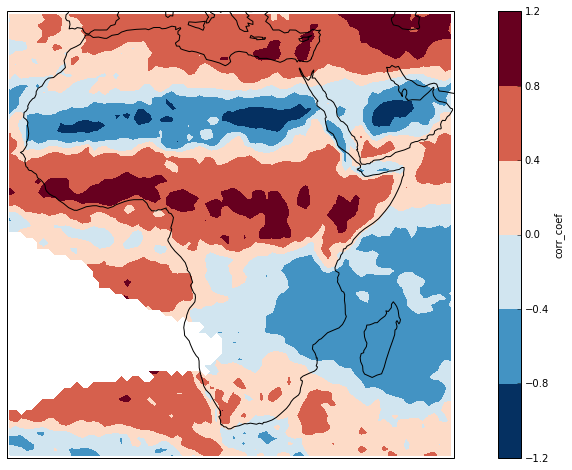

In [31]:
ops.plot_map(correlation, var='corr_coef', 
                 lat_min=-40., lat_max=40., lon_min=-20., lon_max=60., file='/home/ccitbx/Desktop/fig8.png')